<a href="https://colab.research.google.com/github/Myeong-bin/test1/blob/main/chapter05_i%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [ ]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

11490434/11490434 [==============================] - 1s 0us/step


**Training the same model on MNIST data with noise channels or all-zero channels**

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

**Plotting a validation accuracy comparison**

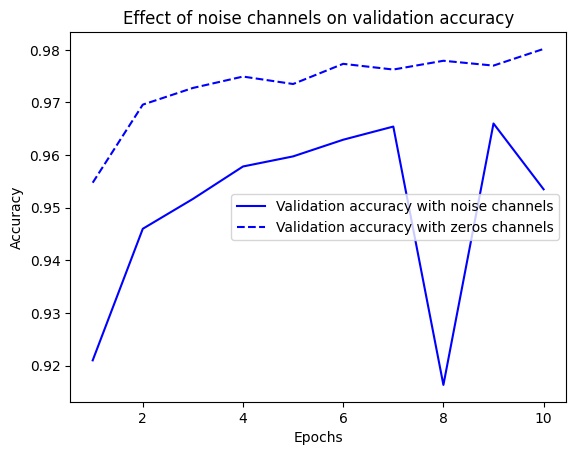

In [ ]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**


여기서는 accuracy보다는 val이 중요함

In [ ]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, random_train_labels,
          epochs=100,
          batch_size=128,
          validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 2s 4ms/step - loss: 2.3144 - accuracy: 0.1026 - val_loss: 2.3070 - val_accuracy: 0.1030
Epoch 2/100
375/375 [==============================] - 2s 4ms/step - loss: 2.2988 - accuracy: 0.1172 - val_loss: 2.3085 - val_accuracy: 0.1051
Epoch 3/100
375/375 [==============================] - 1s 4ms/step - loss: 2.2905 - accuracy: 0.1274 - val_loss: 2.3155 - val_accuracy: 0.0980
Epoch 4/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2788 - accuracy: 0.1397 - val_loss: 2.3256 - val_accuracy: 0.1002
Epoch 5/100
375/375 [==============================] - 1s 4ms/step - loss: 2.2637 - accuracy: 0.1497 - val_loss: 2.3386 - val_accuracy: 0.1042
Epoch 6/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2444 - accuracy: 0.1617 - val_loss: 2.3462 - val_accuracy: 0.0995
Epoch 7/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2214 - accuracy: 0.1810 - val_loss: 2.3692 - val_accuracy: 0.0988

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

이건 틀린 코드임. RMSprop(1.) << 이 부분 숫자 너무 크기 때문

In [ ]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 775.3257 - accuracy: 0.3906 - val_loss: 2.5630 - val_accuracy: 0.2518
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 2.7229 - accuracy: 0.2385 - val_loss: 2.8339 - val_accuracy: 0.2312
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 3.4231 - accuracy: 0.1966 - val_loss: 2.1622 - val_accuracy: 0.2052
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 2.4362 - accuracy: 0.2018 - val_loss: 2.7069 - val_accuracy: 0.2166
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 2.5006 - accuracy: 0.1977 - val_loss: 2.2812 - val_accuracy: 0.1970
Epoch 6/10
375/375 [==============================] - 2s 4ms/step - loss: 2.4071 - accuracy: 0.1778 - val_loss: 2.2453 - val_accuracy: 0.1568
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 2.4680 - accuracy: 0.2146 - val_loss: 2.1192 - val_accuracy: 0.2143
Epoc

**The same model with a more appropriate learning rate**

이게 맞는 코드

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 0.3331 - accuracy: 0.9160 - val_loss: 0.1435 - val_accuracy: 0.9588
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1232 - accuracy: 0.9654 - val_loss: 0.1566 - val_accuracy: 0.9638
Epoch 3/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0947 - accuracy: 0.9748 - val_loss: 0.1332 - val_accuracy: 0.9678
Epoch 4/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0778 - accuracy: 0.9800 - val_loss: 0.1788 - val_accuracy: 0.9628
Epoch 5/10
375/375 [==============================] - 2s 6ms/step - loss: 0.0691 - accuracy: 0.9831 - val_loss: 0.1936 - val_accuracy: 0.9660
Epoch 6/10
375/375 [==============================] - 3s 9ms/step - loss: 0.0591 - accuracy: 0.9851 - val_loss: 0.1774 - val_accuracy: 0.9723
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0531 - accuracy: 0.9876 - val_loss: 0.1832 - val_accuracy: 0.9726
Epoch 

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

layer 가 하나뿐임 >> simple, 오버피팅 안 보임

In [ ]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 3ms/step - loss: 0.6612 - accuracy: 0.8370 - val_loss: 0.3587 - val_accuracy: 0.9047
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3530 - accuracy: 0.9030 - val_loss: 0.3104 - val_accuracy: 0.9158
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3184 - accuracy: 0.9113 - val_loss: 0.2937 - val_accuracy: 0.9183
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3021 - accuracy: 0.9164 - val_loss: 0.2836 - val_accuracy: 0.9204
Epoch 5/20
375/375 [==============================] - 1s 4ms/step - loss: 0.2925 - accuracy: 0.9185 - val_loss: 0.2787 - val_accuracy: 0.9210
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2862 - accuracy: 0.9205 - val_loss: 0.2746 - val_accuracy: 0.9247
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2811 - accuracy: 0.9210 - val_loss: 0.2718 - val_accuracy: 0.9255
Epoch 

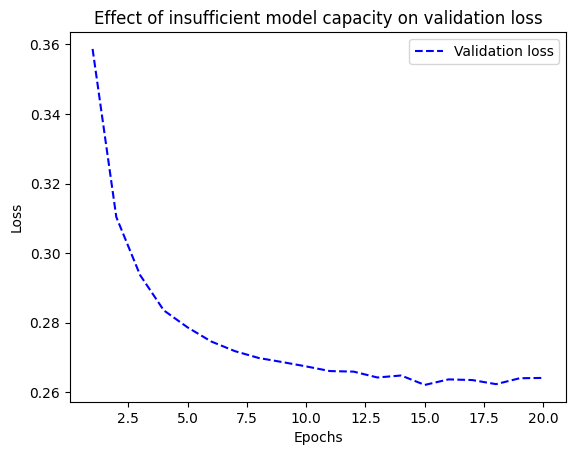

In [ ]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

이게 더 큰 모델임

In [ ]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 3s 4ms/step - loss: 0.3670 - accuracy: 0.8970 - val_loss: 0.1860 - val_accuracy: 0.9472
Epoch 2/20
375/375 [==============================] - 1s 4ms/step - loss: 0.1628 - accuracy: 0.9513 - val_loss: 0.1382 - val_accuracy: 0.9603
Epoch 3/20
375/375 [==============================] - 2s 5ms/step - loss: 0.1140 - accuracy: 0.9656 - val_loss: 0.1078 - val_accuracy: 0.9680
Epoch 4/20
375/375 [==============================] - 2s 4ms/step - loss: 0.0881 - accuracy: 0.9734 - val_loss: 0.1042 - val_accuracy: 0.9683
Epoch 5/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0714 - accuracy: 0.9778 - val_loss: 0.0980 - val_accuracy: 0.9716
Epoch 6/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0592 - accuracy: 0.9818 - val_loss: 0.0996 - val_accuracy: 0.9720
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0487 - accuracy: 0.9846 - val_loss: 0.0931 - val_accuracy: 0.9737
Epoch 

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

17464789/17464789 [==============================] - 1s 0us/step
Epoch 1/20
30/30 [==============================] - 4s 82ms/step - loss: 0.5556 - accuracy: 0.7617 - val_loss: 0.4399 - val_accuracy: 0.8428
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3605 - accuracy: 0.8935 - val_loss: 0.3496 - val_accuracy: 0.8761
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2680 - accuracy: 0.9177 - val_loss: 0.2997 - val_accuracy: 0.8868
Epoch 4/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2137 - accuracy: 0.9307 - val_loss: 0.2763 - val_accuracy: 0.8925
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1772 - accuracy: 0.9432 - val_loss: 0.2757 - val_accuracy: 0.8917
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1496 - accuracy: 0.9537 - val_loss: 0.3227 - val_accuracy: 0.8728
Epoch 7/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1300 - accurac

**Version of the model with lower capacity**

In [ ]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 67ms/step - loss: 0.6325 - accuracy: 0.6334 - val_loss: 0.5835 - val_accuracy: 0.7754
Epoch 2/20
30/30 [==============================] - 1s 32ms/step - loss: 0.5395 - accuracy: 0.7939 - val_loss: 0.5251 - val_accuracy: 0.8055
Epoch 3/20
30/30 [==============================] - 1s 42ms/step - loss: 0.4805 - accuracy: 0.8565 - val_loss: 0.4869 - val_accuracy: 0.8477
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.4358 - accuracy: 0.8911 - val_loss: 0.4675 - val_accuracy: 0.8347
Epoch 5/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3993 - accuracy: 0.9101 - val_loss: 0.4394 - val_accuracy: 0.8818
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.3684 - accuracy: 0.9281 - val_loss: 0.4271 - val_accuracy: 0.8684
Epoch 7/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3391 - accuracy: 0.9383 - val_loss: 0.4166 - val_accuracy: 0.8707
Epoch 8/20
30

**Version of the model with higher capacity**

In [ ]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 71ms/step - loss: 0.5653 - accuracy: 0.7459 - val_loss: 0.5664 - val_accuracy: 0.7244
Epoch 2/20
30/30 [==============================] - 1s 28ms/step - loss: 0.3402 - accuracy: 0.8590 - val_loss: 0.2840 - val_accuracy: 0.8870
Epoch 3/20
30/30 [==============================] - 1s 27ms/step - loss: 0.2400 - accuracy: 0.9034 - val_loss: 0.2719 - val_accuracy: 0.8880
Epoch 4/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1745 - accuracy: 0.9351 - val_loss: 0.3603 - val_accuracy: 0.8586
Epoch 5/20
30/30 [==============================] - 1s 27ms/step - loss: 0.1432 - accuracy: 0.9456 - val_loss: 0.3366 - val_accuracy: 0.8685
Epoch 6/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1015 - accuracy: 0.9637 - val_loss: 0.3893 - val_accuracy: 0.8613
Epoch 7/20
30/30 [==============================] - 1s 43ms/step - loss: 0.0836 - accuracy: 0.9723 - val_loss: 0.3458 - val_accuracy: 0.8875
Epoch 8/20
30

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [ ]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 66ms/step - loss: 0.6473 - accuracy: 0.7555 - val_loss: 0.5250 - val_accuracy: 0.8572
Epoch 2/20
30/30 [==============================] - 1s 23ms/step - loss: 0.4450 - accuracy: 0.8852 - val_loss: 0.4312 - val_accuracy: 0.8631
Epoch 3/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3611 - accuracy: 0.9039 - val_loss: 0.3953 - val_accuracy: 0.8741
Epoch 4/20
30/30 [==============================] - 1s 22ms/step - loss: 0.3179 - accuracy: 0.9197 - val_loss: 0.3640 - val_accuracy: 0.8848
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2898 - accuracy: 0.9283 - val_loss: 0.3650 - val_accuracy: 0.8825
Epoch 6/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2719 - accuracy: 0.9345 - val_loss: 0.3551 - val_accuracy: 0.8894
Epoch 7/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2619 - accuracy: 0.9383 - val_loss: 0.3582 - val_accuracy: 0.8875
Epoch 8/20
30

**Different weight regularizers available in Keras**

In [ ]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [ ]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 4s 67ms/step - loss: 0.6439 - accuracy: 0.6233 - val_loss: 0.5436 - val_accuracy: 0.8213
Epoch 2/20
30/30 [==============================] - 1s 22ms/step - loss: 0.5326 - accuracy: 0.7505 - val_loss: 0.4214 - val_accuracy: 0.8715
Epoch 3/20
30/30 [==============================] - 1s 22ms/step - loss: 0.4495 - accuracy: 0.8135 - val_loss: 0.3591 - val_accuracy: 0.8782
Epoch 4/20
30/30 [==============================] - 1s 24ms/step - loss: 0.3812 - accuracy: 0.8530 - val_loss: 0.3197 - val_accuracy: 0.8851
Epoch 5/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3365 - accuracy: 0.8781 - val_loss: 0.2946 - val_accuracy: 0.8855
Epoch 6/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2915 - accuracy: 0.9013 - val_loss: 0.2803 - val_accuracy: 0.8902
Epoch 7/20
30/30 [==============================] - 1s 39ms/step - loss: 0.2567 - accuracy: 0.9143 - val_loss: 0.2783 - val_accuracy: 0.8898
Epoch 8/20
30

## Summary